# Exploratory Computing with Python
*Developed by Mark Bakker*
## Notebook 6 : Individual Notebook
### Enter your name, studienummer and date of birth below

In [1]:
print('Name: Pieter van Halem')
print('Studienummer: 4597591')
print('Date of birth: 02-02-1995')

Name: Pieter van Halem
Studienummer: 4597591
Date of birth: 02-02-1995


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Exercise 1

Write a function that plots a square centered at the origin. The length of the side of the square is $L$. The input of the function is the length $L$. 

Next, write a loop that calls your function for $L$ going from 1 up to and including 5 with steps of 1. 
Use `plt.axis('scaled')` to make sure your squares look like squares and not rectangles.

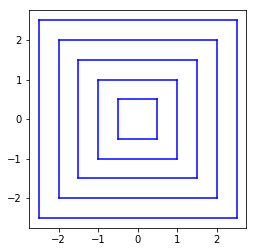

In [3]:
def square(L):
    x1 = np.linspace(-0.5 * L, 0.5*L, 100)
    x2 = np.linspace(0.5 * L, 0.5 * L, 100)
    y1 = 0.5 * L * np.ones(100)
    y2 = -0.5 * L * np.ones(100)
    plt.plot(x1, y1, 'b' ,x1, y2, 'b', x2, x1, 'b', -x2, x1, 'b',);
    plt.axis('scaled')

for i in range(6):
    square(i)  

### Exercise 2
Consider a polynomial $y(x)$ with $N$ roots (the values $x_1$, $x_2$, ..., $x_N$ where the polynomial equals zero):

$$y=A(x-x_1)(x-x_2)...(x-x_N)$$

Write a Python function for the polynomial $y(x)$. The function takes 3 input arguments:
- The factor $A$
- A list or array of the roots of the polynomial
- An array $x$

Your function should return $y(x)$. Your function should work for an arbitrary number of roots. Show that your function works by computing one polynomial with $A=10$ and roots [1, 4, 9] and another with $A=1$ and roots [1, 3, 4, 8, 9] for $x$ going from 0 to 10. Plot both polynomials on the same graph.

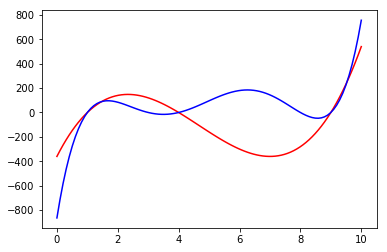

In [4]:
def f(A, roots,  x):
    y = 1
    for i in roots:
        y = y * (x - i)
    return y * A

x = np.linspace(0, 10, 100)
y1 = f(10, [1,4,9], x)
y2 = f(1, [1, 3, 4, 8, 9], x)

plt.plot(x, y1, 'r', x, y2, 'b');

### Exercise 3
The DNA of 54 persons is stored in the file `DNA2.txt`. Each row contains the DNA of the person followed by the name of the person. We believe that one of the persons is actually an alien with the exact same DNA as one of the other persons. Load the data and use a double loop to find the names of the two persons with the exact same DNA. (Note that you don't know yet which one is the alien, but at least you've narrowed it down to two.)

Print to the screen the two names of the persons with the same DNA. Make sure the names are printed as a result of your loop, which should also work for any other file with the same structure. Make sure that the names are printed only once.

In [5]:
DNA = np.genfromtxt('DNA2.txt', dtype='str', delimiter=' ' )
names = DNA[:,1]
mismaches = 0

for x in range(len(names)):
    DNA_found = DNA[x,0]
    for a in range(len(names)):
        for b in range(len(DNA[0,0])):
            if DNA_found[b] != (DNA[a,0])[b]:
                mismaches = mismaches + 1
        if mismaches == 0:
            if a != x:
                print(names[x], 'is an alian, because', names[a], 'has the same DNA')
        mismaches = 0

Marnix is an alian, because Thijmen has the same DNA
Thijmen is an alian, because Marnix has the same DNA


### Exercise 4
In the image below, you can see a possible future for the American flag if some of the American states leave the Union like the Brexit of England. Create a matrix of 13 rows and 20 columns. Create the red and white stripes plus the blue rectangle by assigning 0 (blue), 1 (white), and 2 (red) using at most three assignent statements. Show the matrix to the screen using the `bwr` colormap, and add the row of 9 stars by plotting markers with the `plt.plot` statement. 

Finally, add the line `plt.axis('image')` to your script, so the flag covers up your entire plot (no white banners). 
![](american_flag_brexit.png)

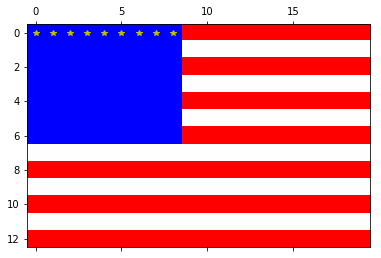

In [6]:
flag = np.ones((13,20))
flag[0::2] = 2
flag[0:7,0:9] = 0


plt.matshow(flag, cmap='bwr')
plt.axis('image')
plt.plot([0,1,2,3,4,5,6,7,8],[0,0,0,0,0,0,0,0,0],'y*');

### Exercise 5
The *average monthly temperature* is stored for twenty years in the file  `temperature_q1.dat`. The file contains 20 rows of 12 columns. Each row represents a year, and each column a month. Load the data and use a loop to plot the *average monthy temperature* for each year on one graph. The horizontal axis runs from 1 through 12 (the number of the month) and all 20 years are plotted on top of each other so you get 20 lines on your graph.  

Next, plot a black line with a linewidth of 4 through the maximum recorded temperature of each month. Plot a second black line with a linewidth of 4 for the minimum recorded temperature of each month. Add labels along the axes.

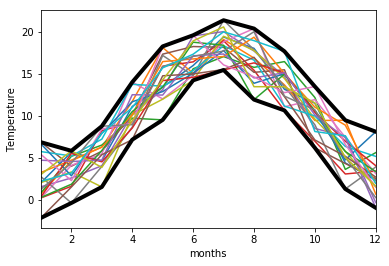

In [7]:
temp = np.genfromtxt('temperature_q1.dat', delimiter=' ' )
x = np.linspace(1,12,12)
y1 = np.zeros(12)
y2 = np.zeros(12)

for a in range(len(temp[:,0])):
    plt.plot(x, temp[a, :])

for b in range(len(temp[0,:])):
    for c in range(len(temp[:,0])):
        if temp[c,b] > y1[b]:
            y1[b] = temp[c, b]
plt.plot(x,y1,'k', linewidth=4 )


for b in range(len(temp[0,:])):
    for c in range(len(temp[:,0])):
        if temp[c,b] < y1[b]:
            y1[b] = temp[c, b]
plt.plot(x,y1,'k', linewidth=4 )

plt.xlim(1, 12)
plt.xlabel('months')
plt.ylabel('Temperature');
